In [1]:
"""
Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
"""
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from dl_portfolio.cluster import get_cluster_labels
from dl_portfolio.nmf.convex_nmf import ConvexNMF

# Dataset 1

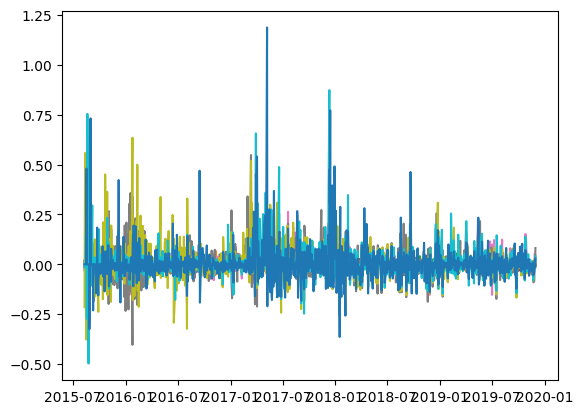

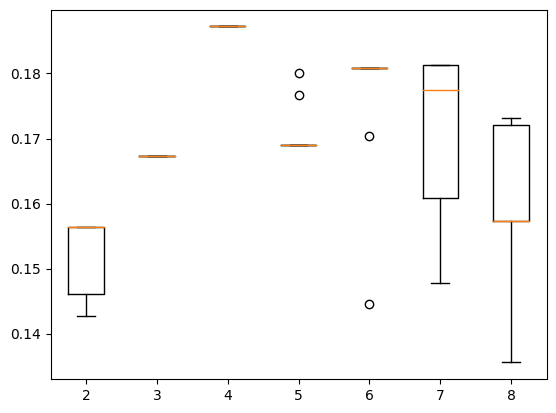

In [13]:
data = pd.read_csv("data/dataset1/dataset1.csv", index_col=0, parse_dates=True)
returns = data.pct_change().dropna()
train_ret = returns.loc[:"2019-12-01"]
plt.plot(train_ret)
plt.show()

X = StandardScaler().fit_transform(train_ret.values)
X = X.T
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
random_states = range(10)
all_scores = []
for seed in random_states:
    scores = {}
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        nmf = ConvexNMF(
            n_components=n_clusters,
            random_state=seed
        )
        nmf.fit(X.T)
        embedding = pd.DataFrame(nmf.encoding, index=train_ret.columns)
        clusters, labels = get_cluster_labels(embedding)
        cluster_labels = labels["label"].values
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        scores[n_clusters] = silhouette_avg
    all_scores.append(scores)

all_scores = pd.DataFrame(all_scores)
_ = plt.boxplot(all_scores.T)
_ = plt.xticks(range(1, len(range_n_clusters) + 1), range_n_clusters)

The optimal number of clusters seems to be 4, 5 or 6. Let us look at the silouhette plots:

For n_clusters = 4 The average silhouette_score is : 0.1872268495608384
For n_clusters = 5 The average silhouette_score is : 0.16907920649787536
For n_clusters = 6 The average silhouette_score is : 0.1808883669530596


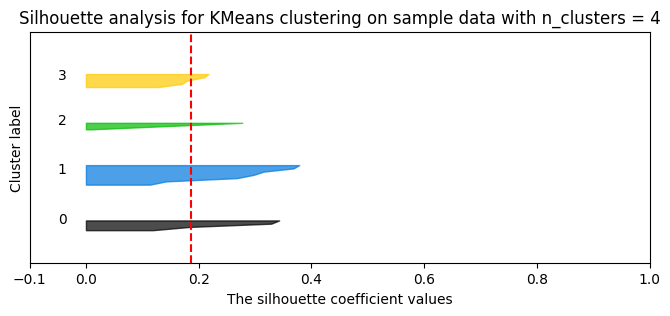

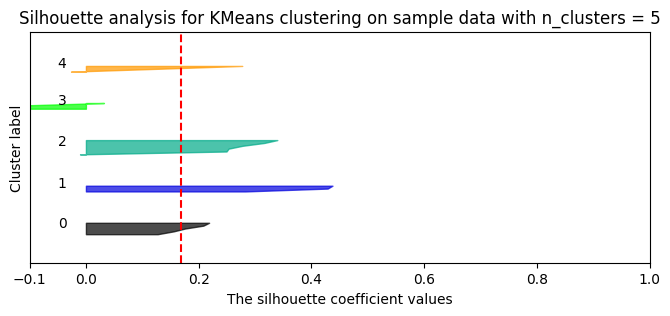

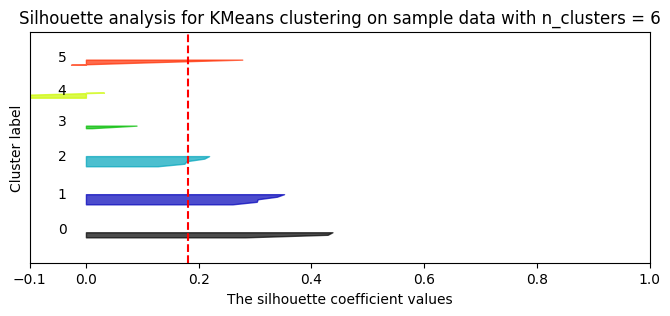

{4: 0.1872268495608384, 5: 0.16907920649787536, 6: 0.1808883669530596}

In [15]:
random_states = 10
scores = {}
for n_clusters in [4, 5, 6]:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    nmf = ConvexNMF(
        n_components=n_clusters,
        random_state=seed
    )
    nmf.fit(X.T)
    embedding = pd.DataFrame(nmf.encoding, index = train_ret.columns)
    clusters, labels = get_cluster_labels(embedding)
    cluster_labels = labels["label"].values

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    scores[n_clusters] = silhouette_avg

    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 3)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ax1.set_title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
    )
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

plt.show()

scores

For n_clusters=5 or 6, one cluster (3 and 4 respectively) has very low silhouette scores. We select optimal number of cluster 4.

# Dataset 2

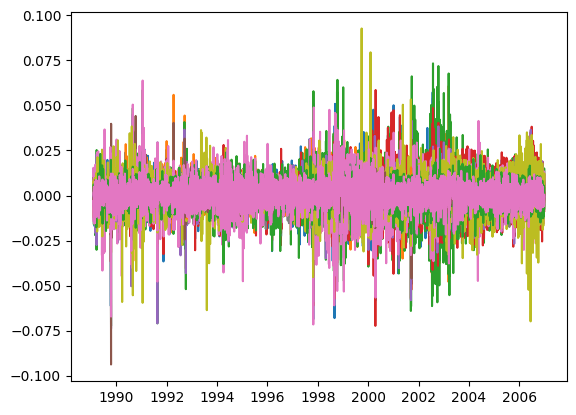

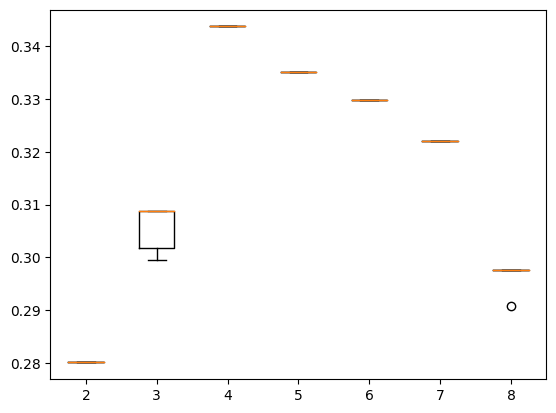

In [19]:
data = pd.read_csv("data/dataset2/dataset2.csv", index_col=0, parse_dates=True)
returns = data.pct_change().dropna()
train_ret = returns.loc[:"2006-12-31"]
plt.plot(train_ret)
plt.show()

X = StandardScaler().fit_transform(train_ret.values)
X = X.T
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
random_states = range(10)
all_scores = []
for seed in random_states:
    scores = {}
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        nmf = ConvexNMF(
            n_components=n_clusters,
            random_state=seed
        )
        nmf.fit(X.T)
        embedding = pd.DataFrame(nmf.encoding, index=train_ret.columns)
        clusters, labels = get_cluster_labels(embedding, threshold=1e-2)
        cluster_labels = labels["label"].values
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        scores[n_clusters] = silhouette_avg
    all_scores.append(scores)

all_scores = pd.DataFrame(all_scores)
_ = plt.boxplot(all_scores.T)
_ = plt.xticks(range(1, len(range_n_clusters) + 1), range_n_clusters)

The optimal number of clusters seems to be 4 or 5. Let us look at the silouhette plots:

For n_clusters = 4 The average silhouette_score is : 0.34378939435279454
For n_clusters = 5 The average silhouette_score is : 0.33511564223286405


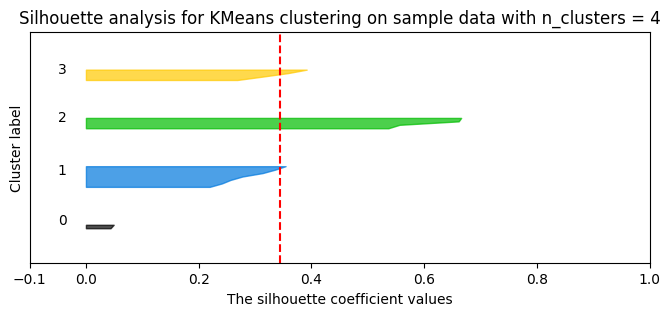

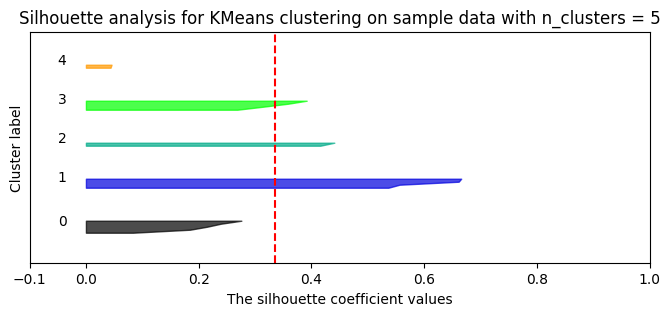

{4: 0.34378939435279454, 5: 0.33511564223286405}

In [21]:
random_states = 10
scores = {}
for n_clusters in [4, 5]:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    nmf = ConvexNMF(
        n_components=n_clusters,
        random_state=seed
    )
    nmf.fit(X.T)
    embedding = pd.DataFrame(nmf.encoding, index = train_ret.columns)
    clusters, labels = get_cluster_labels(embedding, threshold=1e-2)
    cluster_labels = labels["label"].values

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    scores[n_clusters] = silhouette_avg

    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 3)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ax1.set_title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
    )
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

plt.show()

scores

For n_clusters=5, the clusters seems more balanced in size. We select n_clusters=5.